#Image classifiction using CIFAR10 dataset

##In this project we are train our Convolutional Neural Networks (Deep learning) model. we are using in this project CIRAR10 image dataset and we are using Keras library to train our model

In [1]:
# Importing Libaries
import keras
import tensorflow as tf
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Split the dataset
(X_train , y_train) , (X_test , y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape)

(50000, 32, 32, 3)


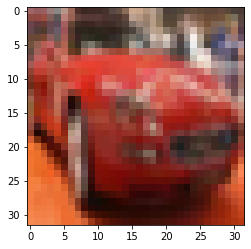

In [4]:
plt.imshow(X_train[5])

In [5]:
print(X_train[5])

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


In [6]:
print(y_train[5])

[1]


In [7]:
#Convert class vectors to binary class metrics
print('Before:',y_test[0])

num_classes=10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

print('After:',y_test[0])

Before: [3]
After: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
# Normalize data
X_train = X_train/255.0
x_test = X_test/255.0

In [9]:
# Create the model
model= tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [10]:
# Model Compile
#sparse_categorical_crossentropy
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=.001),
              metrics=["accuracy"])

In [11]:
# Model training
model.fit(X_train,y_train , epochs=100 ,batch_size=10)
print("Training Completed")

Epoch 1/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3948 - accuracy: 0.2888
Epoch 2/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2699 - accuracy: 0.3497
Epoch 3/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2659 - accuracy: 0.3656
Epoch 4/100
5000/5000 [==============================] - 12s 2ms/step - loss: 0.2648 - accuracy: 0.3700
Epoch 5/100
5000/5000 [==============================] - 12s 2ms/step - loss: 0.2657 - accuracy: 0.3706
Epoch 6/100
5000/5000 [==============================] - 12s 2ms/step - loss: 0.2663 - accuracy: 0.3680
Epoch 7/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2684 - accuracy: 0.3625
Epoch 8/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2693 - accuracy: 0.3588
Epoch 9/100
5000/5000 [==============================] - 13s 3ms/step - loss: 0.2695 - accuracy: 0.3564
Epoch 10/100
5000/5000 [==============================] - 13s 3m

##Test train model

In [12]:
# Prediction

In [13]:
# Importing Liabaries
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [14]:
!pwd   

/content


In [20]:
upload=files.upload()
for f in upload.keys():

  path='/content/'+f
  img=image.load_img(path, target_size=(32,32))
  X=image.img_to_array(img)
  X=np.expand_dims(X, axis=0)

  images=np.vstack([X])
  classes=model.predict(images, batch_size=100)
  print(classes)

classes2=np.argmax(classes,axis=1)

if classes2[0]==0:
  print('Airplone')
elif classes2[0]==1:
  print('Automobile')
elif classes2[0]==2:
  print('Bird')
elif classes2[0]==3:
  print('Cat')
elif classes2[0]==4:
  print('Deer')
elif classes2[0]==5:
  print('Dog')
elif classes2[0]==6:
  print('Frogh')
elif classes2[0]==7:
  print('Horse')
elif classes2[0]==8:
  print('Ship')
elif classes2[0]==9:
  print('Truck')
else:
  print("Can't be Found")

Saving Airplane.jpg to Airplane (1).jpg
[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 6.201885e-35 0.000000e+00]]
Airplone
